<h1> <center>PREDICTING THE COST OF USED CARS</center></h1>

<center></center>


Features:


Name: The brand and model of the car.<br>
Location: The location in which the car is being sold or is available for purchase.<br>
Year: The year or edition of the model.<br>
Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.<br>
Fuel_Type: The type of fuel used by the car.<br>
Transmission: The type of transmission used by the car.<br>
Owner_Type: Whether the ownership is Firsthand, Second hand or other.<br>
Mileage: The standard mileage offered by the car company in kmpl or km/kg<br>
Engine: The displacement volume of the engine in cc.<br>
Power: The maximum power of the engine in bhp.<br>
Seats: The number of seats in the car.<br>
New_Price: The price of a new car of the same model.<br>
Price: The price of the used car in INR Lakhs.

### Import libraries

In [90]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

### Import datasets

In [91]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [92]:
train.shape, test.shape

((6019, 12), (1234, 11))

### Data exploration

In [93]:
train.duplicated().sum(), test.duplicated().sum()

(0, 1)

In [94]:
train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [96]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [97]:
train.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

### Data pre-processing

In [98]:
train = train[train['Kilometers_Driven'] < 700000]
train = train[train['Kilometers_Driven'] > 999]  
len(train)

6014

In [99]:
train = train[train['Fuel_Type'] != 'Electric']
len(train)

6012

In [100]:
train = train[train['Name'] != 'Ambassador Classic Nova Diesel']
train = train[train['Name'] != 'Lamborghini Gallardo Coupe']
train = train[train['Name'] != 'Force One LX 4x4']
train = train[train['Name'] != 'Force One LX ABS 7 Seating']
train = train[train['Name'] != 'Smart Fortwo CDI AT']
len(train)

6006

In [101]:
df = train.append(test, ignore_index=True, sort=False)

In [102]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [103]:
df['Car_Age'] = 2021 - df['Year']

In [104]:
df['Mileage'] = df['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
df['Engine'] = df['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
df['Power'] = df['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [105]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6


In [106]:
df['Seats'] = df['Seats'].fillna(5)

In [107]:
df['New_Price'] = df['Price'].fillna('-1 Lakhs').apply(lambda x: str(x).split(' ')[0]) 
df['New_Price'] = df['Price'].astype(float).replace(-1, np.nan)

In [108]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6,12.50


In [109]:
df['Year'] = df['Year'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

In [110]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                   0
Price                1234
Car_Age                 0
New_Price            1234
dtype: int64

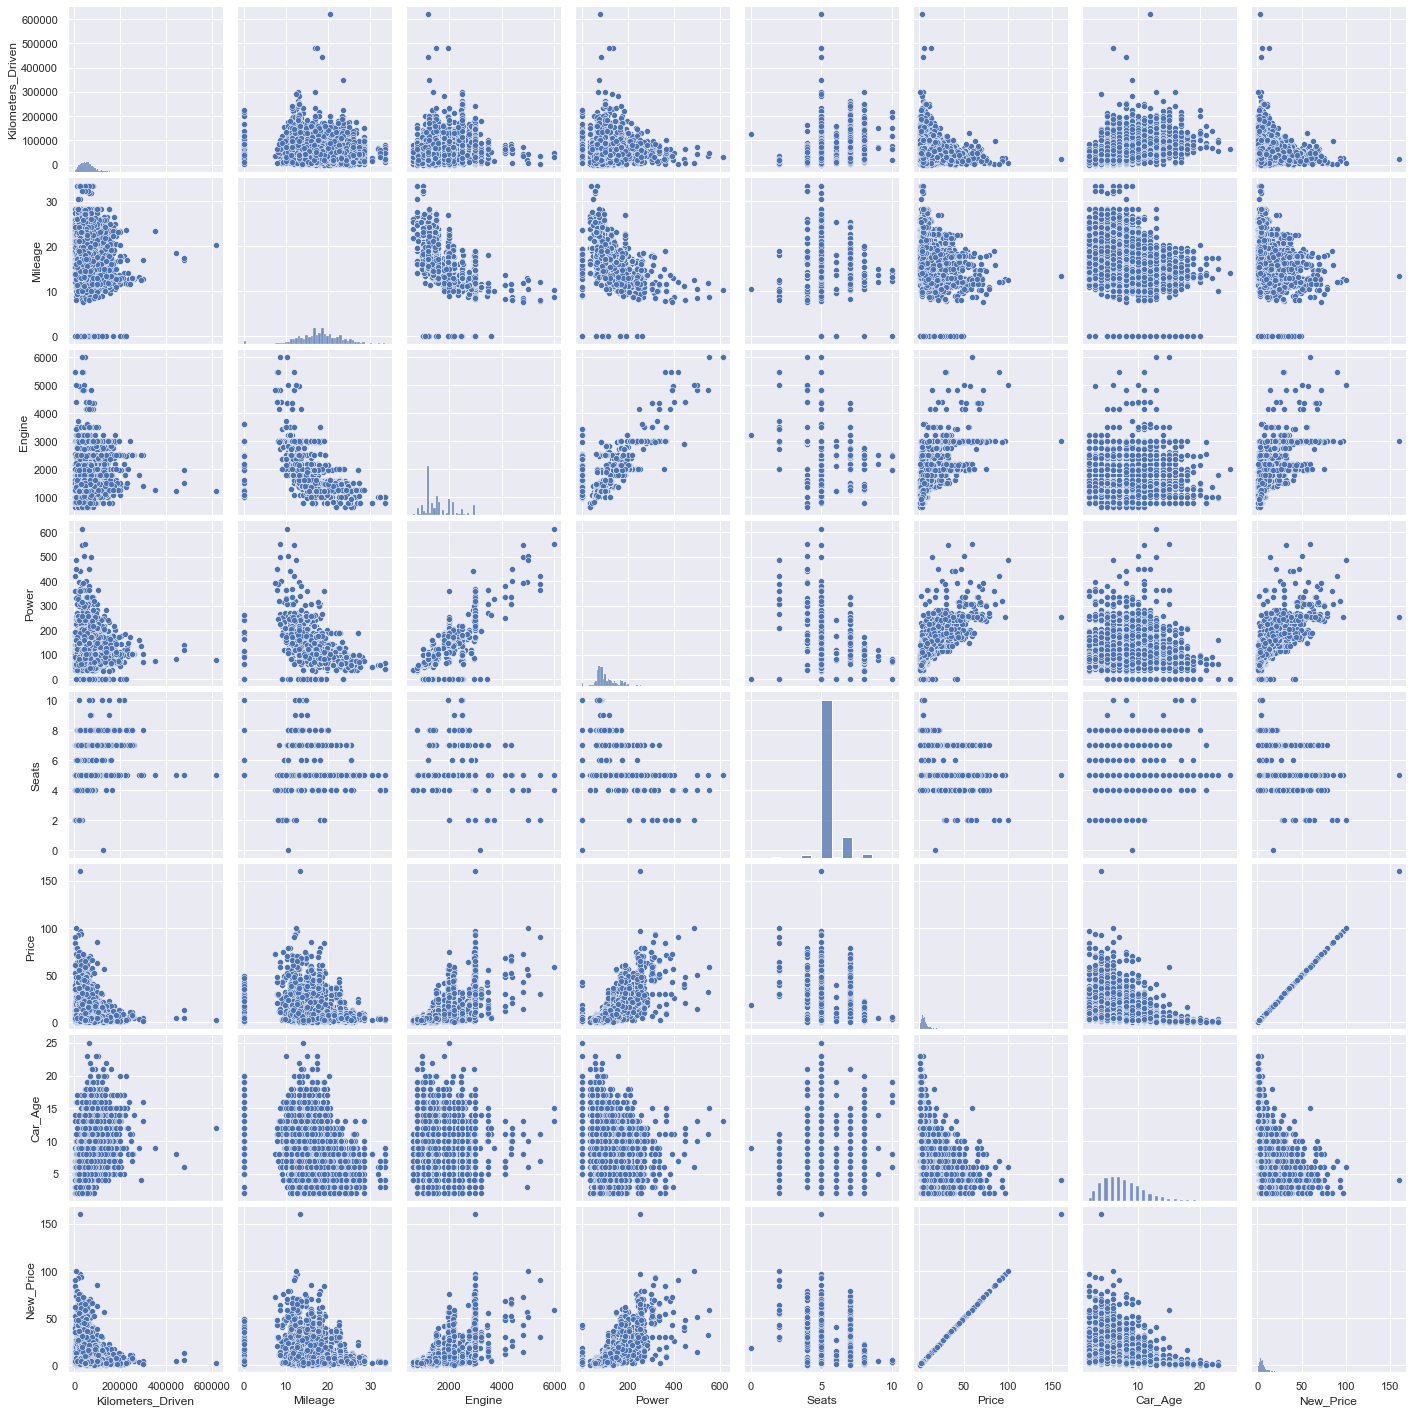

In [111]:
sns.pairplot(df)

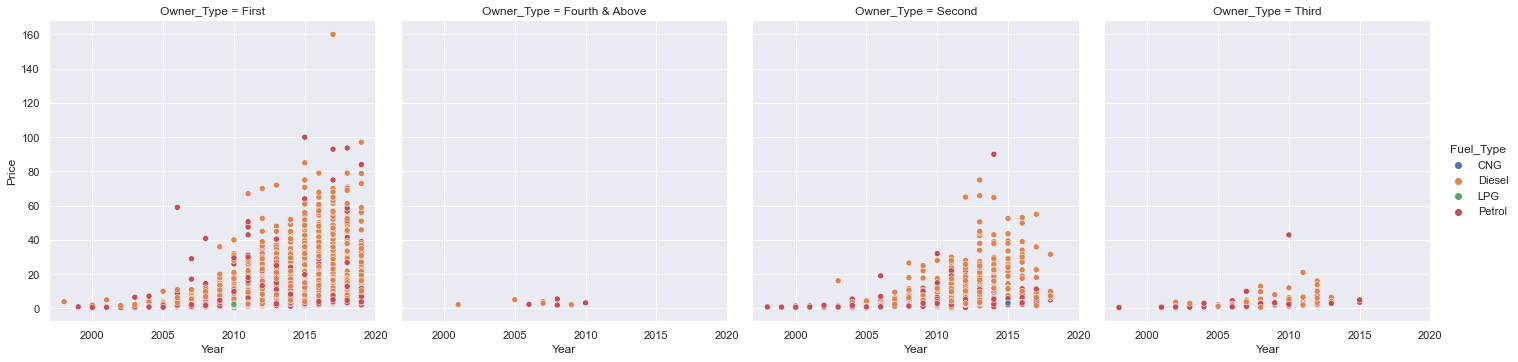

In [112]:
sns.set(font_scale = 1)
sns.relplot(x = "Year" , y = "Price" , data = df , hue = "Fuel_Type" , col = "Owner_Type")

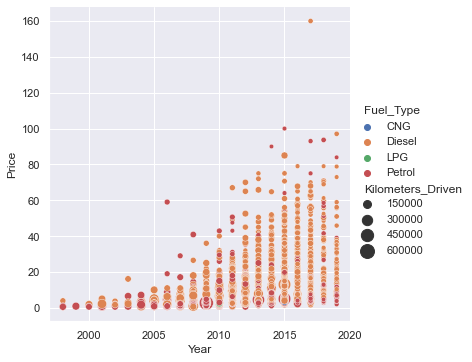

In [114]:
sns.relplot(x = "Year" , y = "Price" , data = df , hue = "Fuel_Type" , 
            size = "Kilometers_Driven", sizes=(20,200))

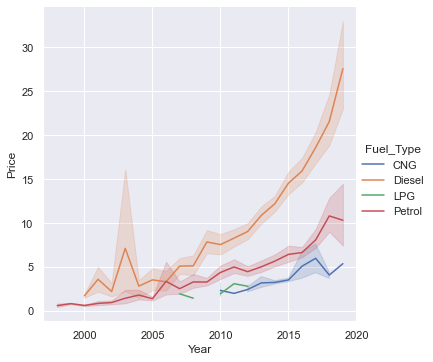

In [115]:
sns.relplot(x = "Year" , y = "Price" , data = df , hue = "Fuel_Type",  kind = "line" )

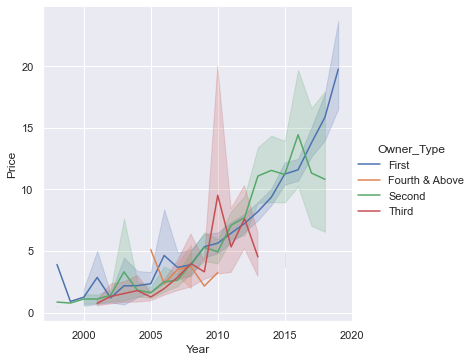

In [119]:
sns.relplot(x = "Year" , y = "Price" , data = df , hue = "Owner_Type" , kind="line" )

In [120]:
df['Car_Brand1'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))

df['Engine'] = df.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Engine']
df['Power'] = df.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Power']
df['New_Price'] = df.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.mean()))['New_Price']

In [121]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
New_Price               7
Car_Brand1              0
dtype: int64

In [122]:
df['Car_Brand2'] = df['Name'].apply(lambda x: x.split(' ')[0])

df['New_Price'] = df.groupby(['Car_Brand2']).transform(lambda x: x.fillna(x.mean()))['New_Price']

In [123]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Age                 0
New_Price               2
Car_Brand1              0
Car_Brand2              0
dtype: int64

In [124]:
def aggregate_functions(df):        
    
    agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
    agg_df = df.groupby(['Car_Brand1']).agg(agg_func)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    agg_df.reset_index(inplace=True)
    
    agg_df = pd.merge(df, agg_df, on='Car_Brand1', how='left')
    
    return agg_df

In [125]:
df = aggregate_functions(df)

In [126]:
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,New_Price,Car_Brand1,Car_Brand2,Location_count,Mileage_mean,Power_mean,Engine_mean
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,11,1.75,Maruti Wagon,Maruti,177,20.912373,66.201808,1014.056497


In [127]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,New_Price,Car_Brand1,Car_Brand2,Location_count,Mileage_mean,Power_mean,Engine_mean
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11,1.750000,Maruti Wagon,Maruti,177,20.912373,66.201808,1014.056497
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6,12.500000,Hyundai Creta,Hyundai,118,17.673898,121.830508,1572.745763
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10,4.500000,Honda Jazz,Honda,70,20.531429,91.481429,1280.071429
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9,6.000000,Maruti Ertiga,Maruti,86,20.633953,89.712093,1287.860465
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8,17.740000,Audi A4,Audi,90,16.438111,162.041556,2024.922222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,10,5.306792,Volkswagen Vento,Volkswagen,128,18.426719,104.199141,1552.640625
7236,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,6,4.461325,Volkswagen Polo,Volkswagen,178,18.522753,80.534831,1262.904494
7237,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,9,3.342424,Nissan Micra,Nissan,45,20.869556,67.088000,1326.577778
7238,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,8,4.461325,Volkswagen Polo,Volkswagen,178,18.522753,80.534831,1262.904494


In [128]:
df.drop(['Name','Car_Brand1','Car_Brand2'], axis=1, inplace=True)

In [129]:
train_df = df[df['Price'].isnull()!=True]
test_df = df[df['Price'].isnull()==True]
test_df.drop('Price', axis=1, inplace=True)

In [130]:
train_df.shape, test_df.shape

((6006, 17), (1234, 16))

In [ ]:
#Feature Engineering and outlier removal is in the other notebook